# Pynamical Stock Predictions

In [1]:
# Libraries
import pandas as pd
import numpy as np
import math
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
stock = 'AAPL'
start = '2015-01-01' 
end = '2020-01-01'
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-01-02,99.945885,109.330002,111.440002,107.349998,111.389999,53204600
2015-01-05,97.130241,106.250000,108.650002,105.410004,108.290001,64285500
2015-01-06,97.139420,106.260002,107.430000,104.629997,106.540001,65797100
2015-01-07,98.501518,107.750000,108.199997,106.699997,107.199997,40105900
2015-01-08,102.286186,111.889999,112.150002,108.699997,109.230003,59364500


In [4]:
df.tail()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-12-24,282.831299,284.269989,284.890015,282.920013,284.690002,12119700
2019-12-26,288.442780,289.910004,289.980011,284.700012,284.820007,23280300
2019-12-27,288.333313,289.799988,293.970001,288.119995,291.119995,36566500
2019-12-30,290.044617,291.519989,292.690002,285.220001,289.459991,36028600
2019-12-31,292.163818,293.649994,293.679993,289.519989,289.929993,25201400


In [11]:
x = df['Adj Close']

In [13]:
def f(x):
    return  np.log(x / x.shift(1))

In [15]:
rets = df['Adj Close'].pct_change().dropna()

In [19]:
x = (rets + 1).cumprod()

In [32]:
x.values

array([0.97182832, 0.97192015, 0.98554851, ..., 2.8848943 , 2.9020166 ,
       2.92322009])

In [46]:
x.min()

0.8500891633938563

In [47]:
x.max()

2.923220092782452

In [48]:
pops = simulate(num_gens=100, rate_min=x.min(), rate_max=3, num_rates=1000)

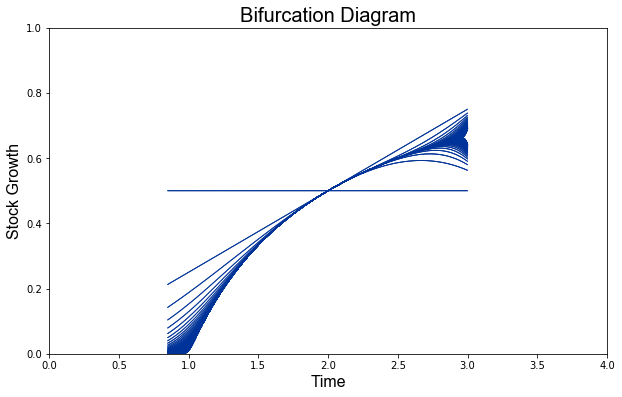

In [49]:
from pynamical import logistic_map, simulate, bifurcation_plot
bifurcation_plot(pops,xlabel="Time", ylabel="Stock Growth")